# Problem Statement

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

By analysing the data provided on the basis of Target variable(loan defaulter or not) and along with other variables find the risk cases in approving loans to various categories of applicants.

In [1]:
# libraries for maths and analysis
import pandas as pd
import numpy as np

# libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# fixing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Create the dataframe
df1 = pd.read_csv('application_data.csv')
df2=pd.read_csv("previous_application.csv")

In [3]:
df1.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df2.head(3)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


# UNDERSTANDING Data

### Application Data

In [5]:
df1.shape

(307511, 122)

In [6]:
df1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [7]:
#Check the datatypes of all the columns of the dataframe
df1.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

 #### INFERENCE
 Data types of the columns seems to be of appropriate type. Hence no need to change the data types of the columns.we have,
 
 *Categorical data: NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR,FLAG_OWN_REALT etc...
 
 *Numerical data: AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE etc...
 
 *Ordinal categorical data: TARGET, CODE_GENDER etc...

In [8]:
df1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


 #### INFERENCE

*For some of the columns the mean and median are having a difference ,shows there is chance for null values and outliers in those columns.

*DAYS_BIRTH,	DAYS_EMPLOYED,	DAYS_REGISTRATION,	DAYS_ID_PUBLISH columns are showing negative values, it must be changed to positive.

### Previous Data

In [9]:
df2.shape

(1670214, 37)

In [10]:
df2.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [11]:
df2.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [12]:
df2.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


# Data Cleaning

### Application Data

In [13]:
#Identifying null values
df1.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [14]:
len(df1)

307511

In [15]:
# Percentage of null values
round(df1.isnull().sum()/len(df1)*100,3)

SK_ID_CURR                     0.000
TARGET                         0.000
NAME_CONTRACT_TYPE             0.000
CODE_GENDER                    0.000
FLAG_OWN_CAR                   0.000
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY     13.502
AMT_REQ_CREDIT_BUREAU_WEEK    13.502
AMT_REQ_CREDIT_BUREAU_MON     13.502
AMT_REQ_CREDIT_BUREAU_QRT     13.502
AMT_REQ_CREDIT_BUREAU_YEAR    13.502
Length: 122, dtype: float64

In [16]:
df1.isnull().sum().sort_values(ascending=False).head(60)/len(df1)*100

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [17]:
# Removing columns where percentage of null values greater than 40 percentage
df1=df1.drop(['COMMONAREA_MEDI','COMMONAREA_AVG','COMMONAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAPARTMENTS_MEDI','FONDKAPREMONT_MODE','LIVINGAPARTMENTS_MODE','LIVINGAPARTMENTS_AVG','LIVINGAPARTMENTS_MEDI','FLOORSMIN_AVG','FLOORSMIN_MODE','FLOORSMIN_MEDI','YEARS_BUILD_MEDI','YEARS_BUILD_MODE','YEARS_BUILD_AVG','OWN_CAR_AGE','LANDAREA_MEDI','LANDAREA_MODE','LANDAREA_AVG','BASEMENTAREA_MEDI','BASEMENTAREA_AVG','BASEMENTAREA_MODE','EXT_SOURCE_1','NONLIVINGAREA_MODE','NONLIVINGAREA_AVG','NONLIVINGAREA_MEDI','ELEVATORS_MEDI','ELEVATORS_AVG','ELEVATORS_MODE','WALLSMATERIAL_MODE','APARTMENTS_MEDI','APARTMENTS_AVG','APARTMENTS_MODE','ENTRANCES_MEDI','ENTRANCES_AVG','ENTRANCES_MODE','LIVINGAREA_AVG','LIVINGAREA_MODE','LIVINGAREA_MEDI','HOUSETYPE_MODE','FLOORSMAX_MODE','FLOORSMAX_MEDI','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BEGINEXPLUATATION_AVG','TOTALAREA_MODE','EMERGENCYSTATE_MODE'],axis=1)
df1.shape

(307511, 74)

In [18]:
df1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'NONLIVINGAPARTMENTS_AVG', 'OBS_30_CN

In [19]:
# Droping other columns which seems to be of less importance
df1=df1.drop(['FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21','FLAG_PHONE','FLAG_EMAIL','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_2', 'EXT_SOURCE_3','AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR','OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE','NONLIVINGAPARTMENTS_AVG'],axis=1)

In [20]:
df1.shape

(307511, 33)

In [21]:
df1.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
R

### Previous Data

In [22]:
#Identifying null values
df2.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [23]:
len(df2)

1670214

In [24]:
# Percentage of null values
round(df2.isnull().sum()/len(df2)*100,3)

SK_ID_PREV                      0.000
SK_ID_CURR                      0.000
NAME_CONTRACT_TYPE              0.000
AMT_ANNUITY                    22.287
AMT_APPLICATION                 0.000
AMT_CREDIT                      0.000
AMT_DOWN_PAYMENT               53.636
AMT_GOODS_PRICE                23.082
WEEKDAY_APPR_PROCESS_START      0.000
HOUR_APPR_PROCESS_START         0.000
FLAG_LAST_APPL_PER_CONTRACT     0.000
NFLAG_LAST_APPL_IN_DAY          0.000
RATE_DOWN_PAYMENT              53.636
RATE_INTEREST_PRIMARY          99.644
RATE_INTEREST_PRIVILEGED       99.644
NAME_CASH_LOAN_PURPOSE          0.000
NAME_CONTRACT_STATUS            0.000
DAYS_DECISION                   0.000
NAME_PAYMENT_TYPE               0.000
CODE_REJECT_REASON              0.000
NAME_TYPE_SUITE                49.120
NAME_CLIENT_TYPE                0.000
NAME_GOODS_CATEGORY             0.000
NAME_PORTFOLIO                  0.000
NAME_PRODUCT_TYPE               0.000
CHANNEL_TYPE                    0.000
SELLERPLACE_

In [25]:
df2.isnull().sum().sort_values(ascending=False)/len(df2)*100

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [26]:
# Removing columns where percentage of null values greater than 40 percentage
df2=df2.drop(['RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY','AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','NAME_TYPE_SUITE','NFLAG_INSURED_ON_APPROVAL','DAYS_TERMINATION','DAYS_LAST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_FIRST_DUE','DAYS_FIRST_DRAWING'],axis=1)
df2.shape

(1670214, 26)

In [27]:
df2.isnull().sum().sort_values(ascending=False).head()/len(df2)*100

AMT_GOODS_PRICE        23.081773
AMT_ANNUITY            22.286665
CNT_PAYMENT            22.286366
PRODUCT_COMBINATION     0.020716
AMT_CREDIT              0.000060
dtype: float64

## Missing value imputation and removing:Application Data

In [28]:
# percentage of null values in 'AMT_ANNUITY' column
df1.AMT_ANNUITY.isnull().sum()/len(df1)*100                  

0.003902299429939092

In [29]:
# percentage of null values in 'AMT_GOODS_PRICE' column
df1.AMT_GOODS_PRICE.isnull().sum()/len(df1)*100

0.09040327012692229

In [30]:
# percentage of null values in 'NAME_TYPE_SUITE' column
df1.NAME_TYPE_SUITE.isnull().sum()/len(df1)*100

0.42014757195677555

In [31]:
# percentage of null values in 'OCCUPATION_TYPE' column
df1.OCCUPATION_TYPE.isnull().sum()/len(df1)*100

31.345545362604916

In [32]:
# Percentage of missing value in ,OCCUPATION_TYPE' column are high so that we need to impute missing values
df1.OCCUPATION_TYPE.value_counts(normalize=True)*100

OCCUPATION_TYPE
Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: proportion, dtype: float64

 #### INFERENCE

Since the most frequent 'OCCUPATION_TYPE' is 'Laborers', already occupying 26 percent of the data and imputing the same for 31 percent of missing data would leads to wrong insights. Hence it is better to remove the column 'OCCUPATION_TYPE.

In [33]:
# Drop column 'OCCUPATION_TYPE'
df1=df1.drop(['OCCUPATION_TYPE'],axis=1)

In [34]:
# percentage of null values in 'CNT_FAM_MEMBERS' column
df1.CNT_FAM_MEMBERS.isnull().sum()/len(df1)*100

0.0006503832383231819

In [35]:
# percentage of null values in 'DAYS_LAST_PHONE_CHANGE' column
df1.DAYS_LAST_PHONE_CHANGE.isnull().sum()/len(df1)*100

0.00032519161916159093

In [36]:
# For rest of the columns , since the percentage of null values is very less(<1%),it is better to remove the rows
df1.dropna(inplace=True)

In [37]:
df1.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
REG_REGION_NOT_LIVE_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
ORGANIZATI

In [38]:
df1.shape

(306206, 32)

#### Drop duplicates

In [39]:

df1.drop_duplicates(inplace=True)

In [40]:
df1.shape

(306206, 32)

#### Handling the Negative Values

In [41]:
# 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE' columns represent Days but it gives negative value, Hence it must be changed to positive
df1['DAYS_BIRTH']=abs(df1['DAYS_BIRTH'])
df1['DAYS_BIRTH'].head(3)

0     9461
1    16765
2    19046
Name: DAYS_BIRTH, dtype: int64

In [42]:
df1['DAYS_EMPLOYED']=abs(df1['DAYS_EMPLOYED'])
df1['DAYS_REGISTRATION']=abs(df1['DAYS_REGISTRATION'])
df1['DAYS_ID_PUBLISH']=abs(df1['DAYS_ID_PUBLISH'])
df1['DAYS_LAST_PHONE_CHANGE']=abs(df1['DAYS_LAST_PHONE_CHANGE'])

## Missing value imputation and removing:Previous Data

In [43]:
df2.isnull().sum().sort_values(ascending=False).head()/len(df2)*100

AMT_GOODS_PRICE        23.081773
AMT_ANNUITY            22.286665
CNT_PAYMENT            22.286366
PRODUCT_COMBINATION     0.020716
AMT_CREDIT              0.000060
dtype: float64

In [44]:
# 'AMT_GOODS_PRICE' columns
df2.AMT_GOODS_PRICE.describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [45]:
df2['AMT_GOODS_PRICE'].skew()

3.0736896781923937

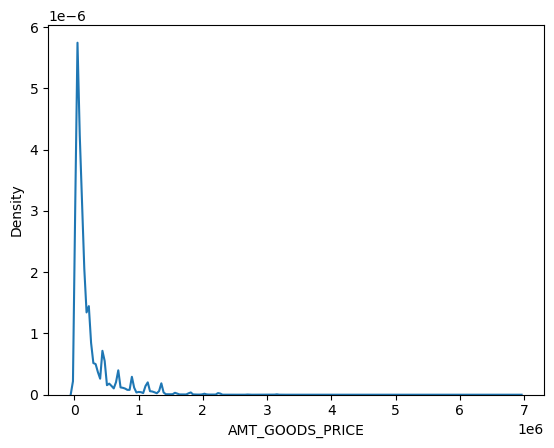

In [46]:
sns.distplot( df2['AMT_GOODS_PRICE'],hist=False);

Right Skewed histogram.Hence we cannot replace null with mean

In [47]:
# in 'AMT_GOODS_PRICE' variable since the distribution is skewed one ,it is better to trplace null values with median
df2.AMT_GOODS_PRICE.fillna(112320,inplace=True)
df2.AMT_GOODS_PRICE.isnull().sum()

0

In [48]:
# 'AMT_ANNUITY' columns
df2.AMT_ANNUITY.describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [49]:
df2['AMT_ANNUITY'].skew()

2.6925715126729455

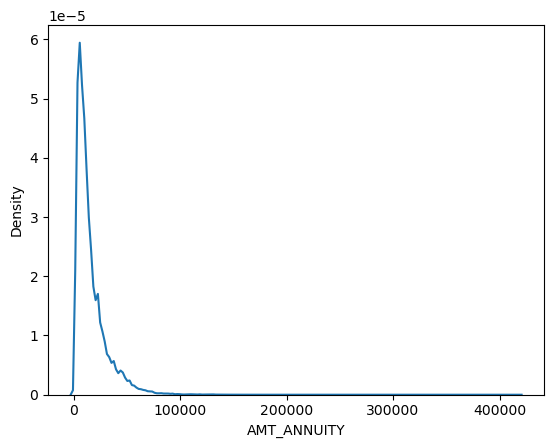

In [50]:
sns.distplot( df2['AMT_ANNUITY'],hist=False);

Right Skewed histogram.Hence we cannot replace null with mean

In [51]:
# in 'AMT_ANNUITY' variable since the distribution is skewed one ,it is better to trplace null values with median
df2.AMT_ANNUITY.fillna(112500,inplace=True)
df2.AMT_ANNUITY.isnull().sum()

0

In [52]:
# 'CNT_PAYMENT' columns
df2.CNT_PAYMENT.describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

In [53]:
df2['CNT_PAYMENT'].skew()

1.5314029823509057

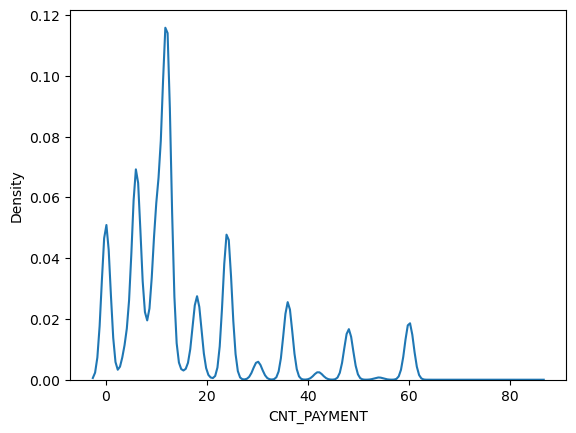

In [54]:
sns.distplot( df2['CNT_PAYMENT'],hist=False);

Right Skewed histogram.Hence we cannot replace null with mean

In [55]:
# in 'AMT_ANNUITY' variable since the distribution is skewed one ,it is better to trplace null values with median
df2.AMT_ANNUITY.fillna(12,inplace=True)
df2.AMT_ANNUITY.isnull().sum()

0

## Handling Outliers :Application Data

In [56]:
# check outliers for some numeric columns
df1.AMT_INCOME_TOTAL.describe()

count    3.062060e+05
mean     1.687826e+05
std      2.375210e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.476000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

 #### INFERENCE

Mean and Median  difference are not too big , also IQR values seems to be of gratual increase. Lets see Boxplot

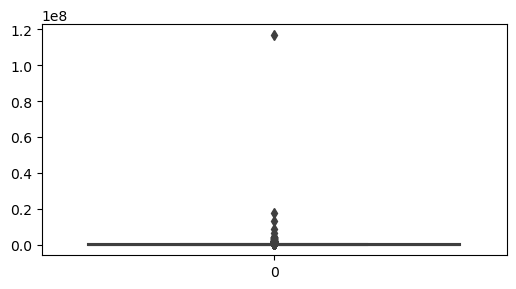

In [57]:
#Box plot for 'AMT_INCOME_TOTAL'column
plt.figure(figsize=[6,3])
sns.boxplot([df1['AMT_INCOME_TOTAL']])
plt.show()

 #### INFERENCE

Even though there are outliers, it seems to be of continous but a few values are standalone.Lets apply capping

In [58]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of 'AMT_INCOME_TOTAL' column
df1['AMT_INCOME_TOTAL'].quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    147600.0
0.70    180000.0
0.90    270000.0
0.95    337500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [59]:
# lets caps to 95th percentile
df1[(df1['AMT_INCOME_TOTAL']>337500)].shape

(13951, 32)

In [60]:
# Capping outliers to 95th percentile
df1['AMT_INCOME_TOTAL']=df1['AMT_INCOME_TOTAL'].apply(lambda x: 337500  if x>337500 else x)

In [61]:
# check outliers for 'AMT_CREDIT','AMT_GOODS_PRICE' columns
df1.AMT_CREDIT.describe()

count    3.062060e+05
mean     5.987994e+05
std      4.019609e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

 #### INFERENCE

Mean and Median  difference are not small , also IQR values seems to be of gratual increase. Lets see Boxplot

In [62]:
df1.AMT_GOODS_PRICE.describe()

count    3.062060e+05
mean     5.379485e+05
std      3.689199e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

 #### INFERENCE

Mean and Median  difference are not too small , also IQR values seems to be of gratual increase. Lets see Boxplot

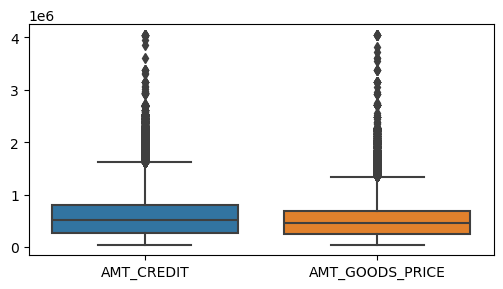

In [63]:
plt.figure(figsize=[6,3])
sns.boxplot([df1['AMT_CREDIT'],df1['AMT_GOODS_PRICE']])
plt.xticks((0,1),['AMT_CREDIT','AMT_GOODS_PRICE'])
plt.show()

 #### INFERENCE

Even though there are outliers, but it is of form continous, also standalone values are very few it is recommended to avoid editing since both of this variables are crucial in case of loan defaulters

In [64]:
# check outliers for 'AMT_ANNUITY' columns
df1.AMT_CREDIT.describe()

count    3.062060e+05
mean     5.987994e+05
std      4.019609e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

 #### INFERENCE

Mean and Median  difference are not small , also IQR values seems to be of gratual increase. Lets see Boxplot

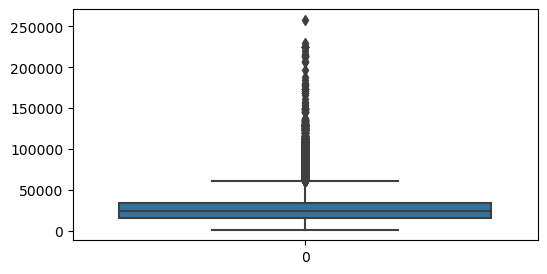

In [65]:
plt.figure(figsize=[6,3])
sns.boxplot(df1['AMT_ANNUITY'])
plt.show()

In [66]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of 'AMT_ANNUITY' column
df1['AMT_ANNUITY'].quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    24930.0
0.70    32017.5
0.90    45954.0
0.95    53325.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

 #### INFERENCE

Even though there are outliers in 'AMT_ANNUITY' column , but it is of form continous, also standalone values are very few it is recommended to avoid editing values since it is crucial in case of loan defaulters

In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306206 entries, 0 to 307510
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   306206 non-null  int64  
 1   TARGET                       306206 non-null  int64  
 2   NAME_CONTRACT_TYPE           306206 non-null  object 
 3   CODE_GENDER                  306206 non-null  object 
 4   FLAG_OWN_CAR                 306206 non-null  object 
 5   FLAG_OWN_REALTY              306206 non-null  object 
 6   CNT_CHILDREN                 306206 non-null  int64  
 7   AMT_INCOME_TOTAL             306206 non-null  float64
 8   AMT_CREDIT                   306206 non-null  float64
 9   AMT_ANNUITY                  306206 non-null  float64
 10  AMT_GOODS_PRICE              306206 non-null  float64
 11  NAME_TYPE_SUITE              306206 non-null  object 
 12  NAME_INCOME_TYPE             306206 non-null  object 
 13  NAME

## Handling Outliers :Previous Data

In [68]:
# Handling outliers for, AMT_ANNUITY ,AMT_APPLICATION ,AMT_CREDIT ,AMT_GOODS_PRICE ,CNT_PAYMENT 

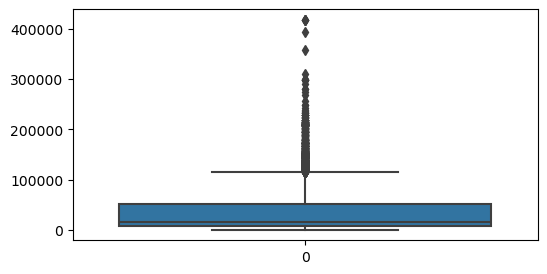

In [69]:
#Box plot for 'AMT_ANNUITY'column
plt.figure(figsize=[6,3])
sns.boxplot([df2['AMT_ANNUITY']])
plt.show()

In [70]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of 'AMT_ANNUITY' column
df2['AMT_ANNUITY'].quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50     15449.67
0.70     34779.60
0.90    112500.00
0.95    112500.00
0.99    112500.00
Name: AMT_ANNUITY, dtype: float64

 #### INFERENCE

Even though there are outliers in 'AMT_ANNUITY' column , but it is of form continous, also standalone values are very few it is recommended to avoid editing values since it is crucial in case of loan defaulters

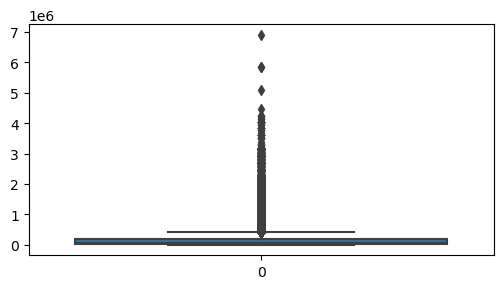

In [71]:
#Box plot for 'AMT_APPLICATION'column
plt.figure(figsize=[6,3])
sns.boxplot([df2['AMT_APPLICATION']])
plt.show()

In [72]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of 'AMT_APPLICATION' column
df2['AMT_APPLICATION'].quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50      71046.0
0.70     144769.5
0.90     450000.0
0.95     787500.0
0.99    1350000.0
Name: AMT_APPLICATION, dtype: float64

In [73]:
# lets caps to 99th percentile
df2[(df2['AMT_APPLICATION']>1350000)].shape

(15952, 26)

In [74]:
# Capping outliers to 99th percentile
df2['AMT_APPLICATION']=df2['AMT_APPLICATION'].apply(lambda x: 1350000  if x>1350000 else x)

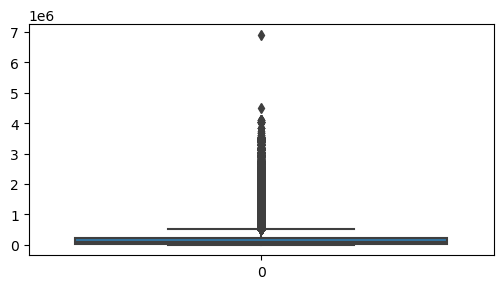

In [75]:
#Box plot for 'AMT_CREDIT'column
plt.figure(figsize=[6,3])
sns.boxplot([df2['AMT_CREDIT']])
plt.show()

In [76]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of 'CNT_PAYMENT' column
df2['AMT_CREDIT'].quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50      80541.0
0.70     167895.0
0.90     533160.0
0.95     886500.0
0.99    1515377.7
Name: AMT_CREDIT, dtype: float64

 #### INFERENCE

Even though there are outliers in 'AMT_CREDIT' column , but it is of form continous, also standalone values are very few it is recommended to avoid editing values since it is crucial in case of loan defaulters

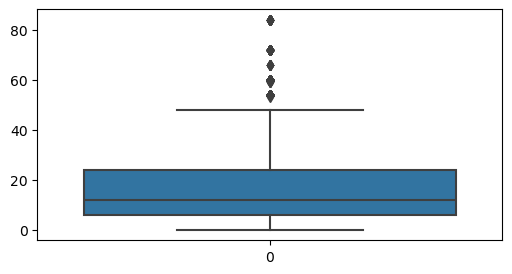

In [77]:
#Box plot for 'CNT_PAYMENT'column
plt.figure(figsize=[6,3])
sns.boxplot([df2['CNT_PAYMENT']])
plt.show()

In [78]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of 'CNT_PAYMENT' column
df2['CNT_PAYMENT'].quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    12.0
0.70    18.0
0.90    36.0
0.95    48.0
0.99    60.0
Name: CNT_PAYMENT, dtype: float64

In [79]:
# Capping outliers to 95th percentile
df2['CNT_PAYMENT']=df2['CNT_PAYMENT'].apply(lambda x: 60  if x>60 else x)

# Standardising values 

In [80]:
# Cheking the 'TARGET' column varaibles to identify the values are of same standard
df1.TARGET.value_counts()

TARGET
0    281451
1     24755
Name: count, dtype: int64

In [81]:
# Cheking the 'NAME_CONTRACT_TYPE' column varaibles to identify the values are of same standard
df1.NAME_CONTRACT_TYPE.value_counts()

NAME_CONTRACT_TYPE
Cash loans         277212
Revolving loans     28994
Name: count, dtype: int64

In [82]:
# Cheking the 'NAME_CONTRACT_TYPE' column varaibles to identify the values are of same standard
df1.CODE_GENDER.value_counts()

CODE_GENDER
F      201635
M      104567
XNA         4
Name: count, dtype: int64

In gender column XNA is not a defined standard value, also negligible in number.Hence remove the rows

In [83]:
# Removing rows with 'CODE_GENDER' value as 'XNA'
df1=df1[~(df1['CODE_GENDER']=='XNA')]
df1.CODE_GENDER.value_counts()

CODE_GENDER
F    201635
M    104567
Name: count, dtype: int64

In [84]:
# Cheking the 'FLAG_OWN_CAR' column varaibles to identify the values are of same standard
df1.FLAG_OWN_CAR.value_counts()

FLAG_OWN_CAR
N    202035
Y    104167
Name: count, dtype: int64

In [85]:
# Cheking the 'DAYS_BIRTH' column varaibles to identify the values are of same standard
df1.DAYS_BIRTH.unique()

array([ 9461, 16765, 19046, ...,  7951,  7857, 25061], dtype=int64)

In [86]:
# Cheking the 'DAYS_REGISTRATION' column varaibles to identify the values are of same standard
df1.DAYS_REGISTRATION.sort_values()

234971        0.0
51455         0.0
226335        0.0
74998         0.0
215889        0.0
           ...   
210943    22858.0
289176    22928.0
249436    23416.0
163628    23738.0
234093    24672.0
Name: DAYS_REGISTRATION, Length: 306202, dtype: float64

Change the data type to int since other days columns are in int format

In [87]:
df1.DAYS_REGISTRATION=df1.DAYS_REGISTRATION.astype(int)

In [88]:
# Similarly change 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE' columns
df1.CNT_FAM_MEMBERS=df1.CNT_FAM_MEMBERS.astype(int)
df1.DAYS_LAST_PHONE_CHANGE=df1.DAYS_LAST_PHONE_CHANGE.astype(int)

# Let us Find the Data Imbalance Percentage


In [89]:
df1.TARGET.value_counts(normalize=True)*100

TARGET
0    91.915468
1     8.084532
Name: proportion, dtype: float64

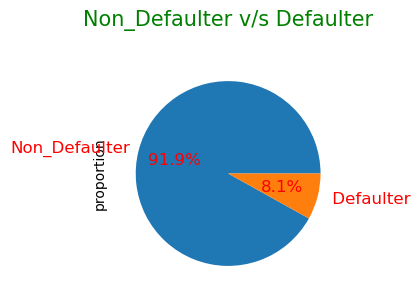

In [90]:
# Pie plot to analyse frequency distribution of defaulters status
plt.figure(figsize=(5,3))
x=['Non_Defaulter',' Defaulter']
df1.TARGET.value_counts(normalize=True).plot.pie(autopct='%1.1f%%',labels=x,textprops={'fontsize':12,'fontweight':2,'color':'red'})
plt.title("Non_Defaulter v/s Defaulter\n",fontsize=15,color='green')
plt.show()

 #### INFERENCE

In the application data provided 92 percentage of applicants are Non-Defaulters while 8 percentage are defaulters.This drastic change in ratio ensures a secured buisness for financial institution.

  # DATA Analysis:Application data

#### NAME_CONTRACT_TYPE & TARGET

AttributeError: 'numpy.int64' object has no attribute 'startswith'

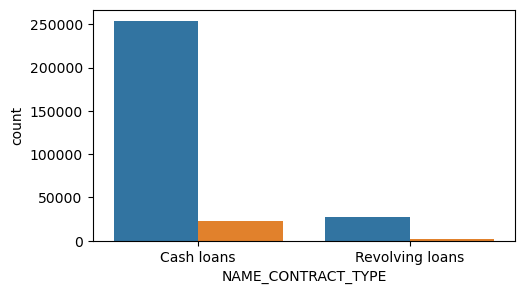

In [91]:
# Count plot to analyse between Loan type and Default status
plt.figure(figsize=(12,3))
plt.subplot(1, 2, 1)
sns.countplot(x='NAME_CONTRACT_TYPE',data=df1,hue='TARGET')
plt.title("Loan type and Target data",fontsize=20,color='red')

plt.subplot(1, 2, 2)
df1.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].mean().plot.bar()
plt.title("Loan type and Defaulters",fontsize=20,color='red')
plt.show()

 #### INFERENCE

Applicants choosing 'cash loans' are more prone to dafault loan payments

#### CODE_GENDER & TARGET

AttributeError: 'numpy.int64' object has no attribute 'startswith'

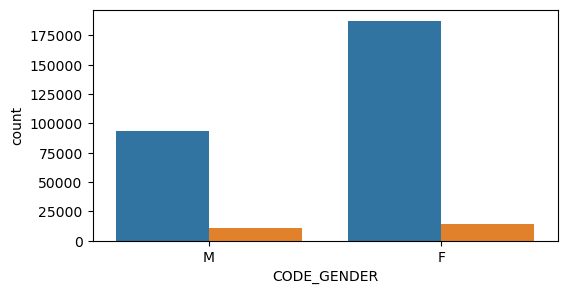

In [92]:
# Count plot to analyse between Gender type and Default status
plt.figure(figsize=(6,3))
sns.countplot(x='CODE_GENDER',data=df1,hue='TARGET')
plt.title("Gender and Defaulter status",fontsize=20,color='red')
plt.show()

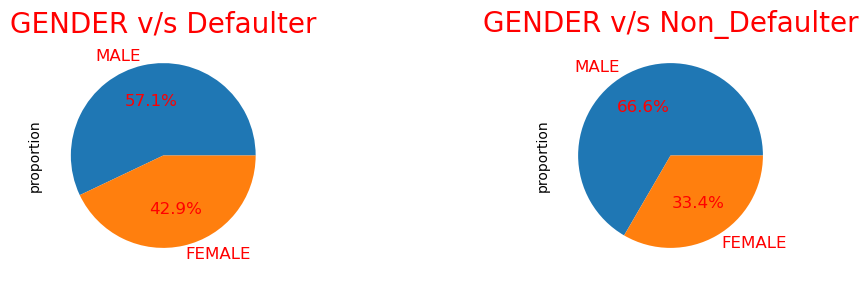

In [93]:
# Pie plot to analyse between Gender type and Default status
plt.figure(figsize=(12,3))
x=['MALE','FEMALE']
plt.subplot(1, 2, 1)
df1[(df1['TARGET']==1)]['CODE_GENDER'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%',labels=x,textprops={'fontsize':12,'fontweight':2,'color':'red'})
plt.title("GENDER v/s Defaulter",fontsize=20,color='red')

plt.subplot(1, 2, 2)
df1[(df1['TARGET']==0)]['CODE_GENDER'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%',labels=x,textprops={'fontsize':12,'fontweight':2,'color':'red'})
plt.title("GENDER v/s Non_Defaulter",fontsize=20,color='red')

plt.show()

 #### INFERENCE

Number of loan applications are more from females and male applicants are more in loan defaulting and loan repaying

#### CODE_GENDER & NAME_CONTRACT_TYPE

In [94]:
df1.groupby(['CODE_GENDER','NAME_CONTRACT_TYPE'])['TARGET'].mean()

CODE_GENDER  NAME_CONTRACT_TYPE
F            Cash loans            0.071906
             Revolving loans       0.052640
M            Cash loans            0.105998
             Revolving loans       0.058509
Name: TARGET, dtype: float64

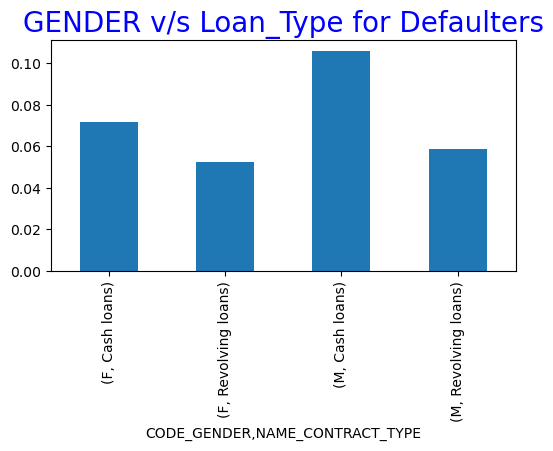

In [95]:
# Count plot to analyse between Loan type and Gender among defaulters
plt.figure(figsize=(6,3))
df1.groupby(['CODE_GENDER','NAME_CONTRACT_TYPE'])['TARGET'].mean().plot.bar()
plt.title("GENDER v/s Loan_Type for Defaulters",fontsize=20,color='blue')
plt.show()

 #### INFERENCE

Mean value of the Target gives the trend of loan defaulters and it shows that Males who prefer cash loans prone to default loans than Female who prefer cash loans

#### ORGANIZATION_TYPE & TARGET

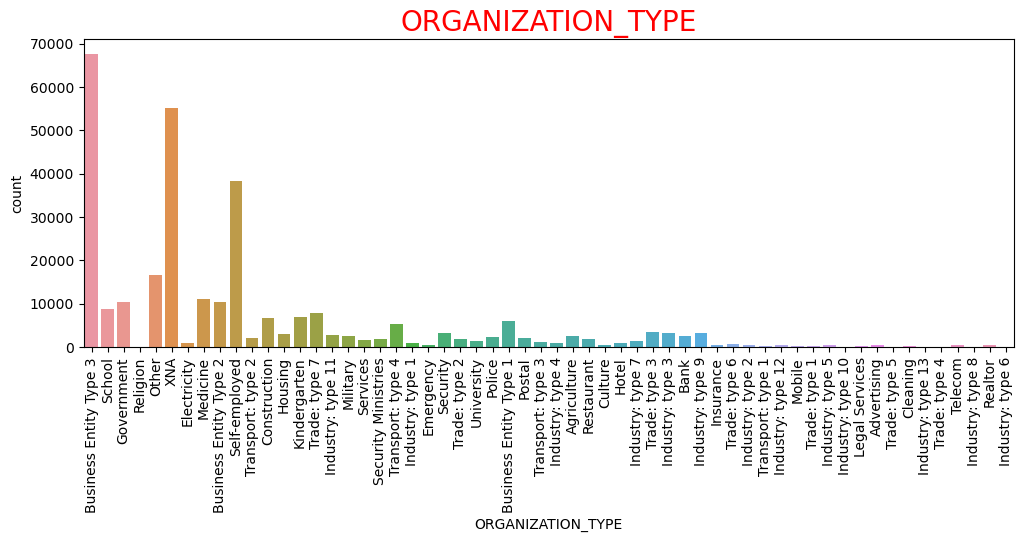

In [96]:
# Count plot to analyse between Organization type 
plt.figure(figsize=(12,4))
sns.countplot(x='ORGANIZATION_TYPE',data=df1)
plt.title("ORGANIZATION_TYPE",fontsize=20,color='red')
plt.xticks(rotation=90)
plt.show()

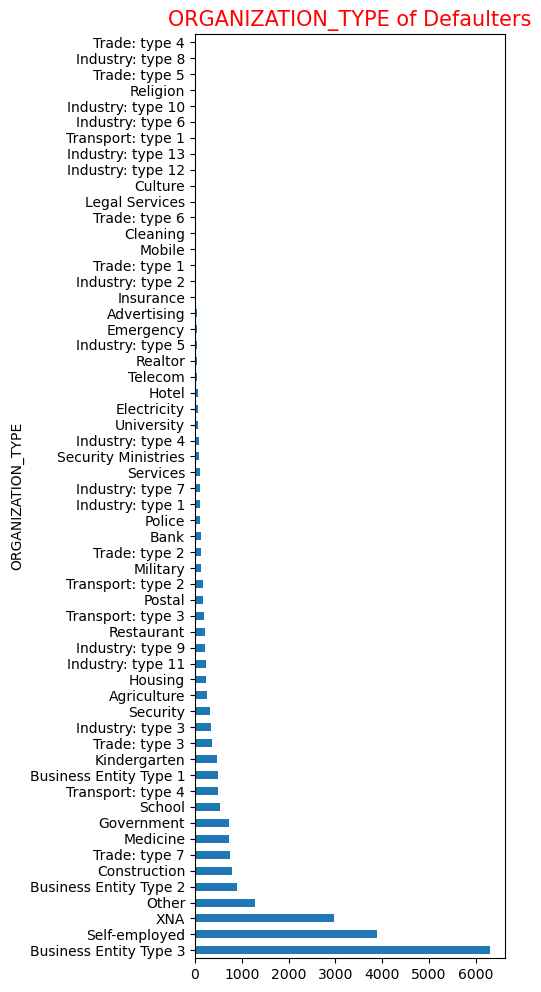

In [97]:
# Bar plot to analyse between Organization type and Defaulters
plt.figure(figsize=(4,12))
df1[(df1['TARGET']==1)]['ORGANIZATION_TYPE'].value_counts().plot.barh()
plt.title("ORGANIZATION_TYPE of Defaulters",fontsize=15,color='red')

plt.show()

 #### INFERENCE

While considering the type of organization defaulters are high in 'Buisness entity type 3' followed by 'Self-employed' and so on.

#### ORGANIZATION_TYPE , TARGET & NAME_CONTRACT_TYPE

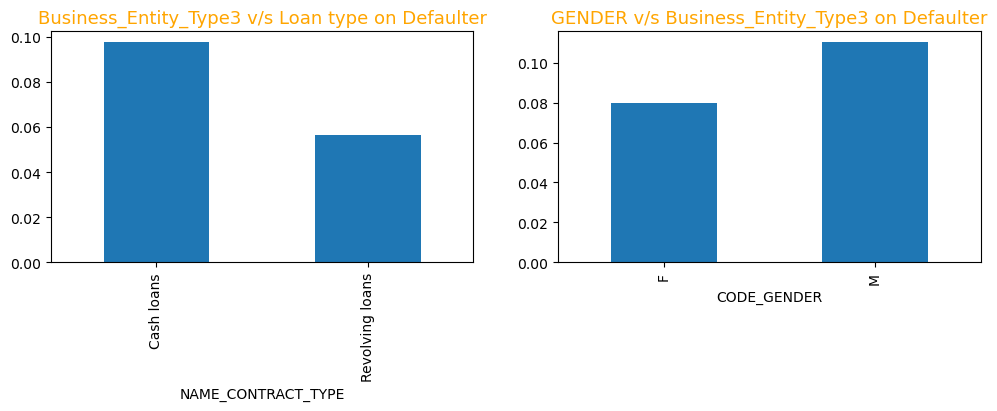

In [98]:
plt.figure(figsize=(12,3))

plt.subplot(1, 2, 1)
df1[(df1['ORGANIZATION_TYPE']=='Business Entity Type 3')].groupby(['NAME_CONTRACT_TYPE'])['TARGET'].mean().plot.bar()
plt.title("Business_Entity_Type3 v/s Loan type on Defaulter",fontsize=13,color='orange')

plt.subplot(1, 2, 2)
df1[(df1['ORGANIZATION_TYPE']=='Business Entity Type 3')].groupby(['CODE_GENDER'])['TARGET'].mean().plot.bar()
plt.title("GENDER v/s Business_Entity_Type3 on Defaulter",fontsize=13,color='orange')

plt.show()

 #### INFERENCE

Also in 'Buisness entity type 3' category applicant prefer cash loan and default more on cash loan. Also considering gender disparity of 'Buisness entity type 3', female applicants are higher than male ,while the number of defaulters are almost same in both.

#### CNT_CHILDREN & TARGET

AttributeError: 'numpy.int64' object has no attribute 'startswith'

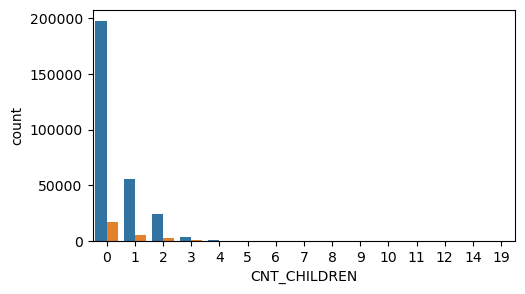

In [99]:
# Count plot to analyse between Children Number and Default status
plt.figure(figsize=(12,3))

plt.subplot(1, 2, 1)
sns.countplot(x='CNT_CHILDREN',data=df1,hue='TARGET')
plt.title("Number of children and TARGETS",fontsize=20,color='red')

plt.subplot(1, 2, 2)
df1.groupby(['CNT_CHILDREN'])['TARGET'].mean().plot.bar()
plt.title("Number of children and TARGETS",fontsize=20,color='orange')

plt.show()

 #### INFERENCE

Applicants having no children tends to take more loans and comparitively they default more loans. Also the applicants with  more than 8 children tends to default loan 100 percentage, but they are very small in number.

#### AMT_INCOME_TOTAL & TARGET

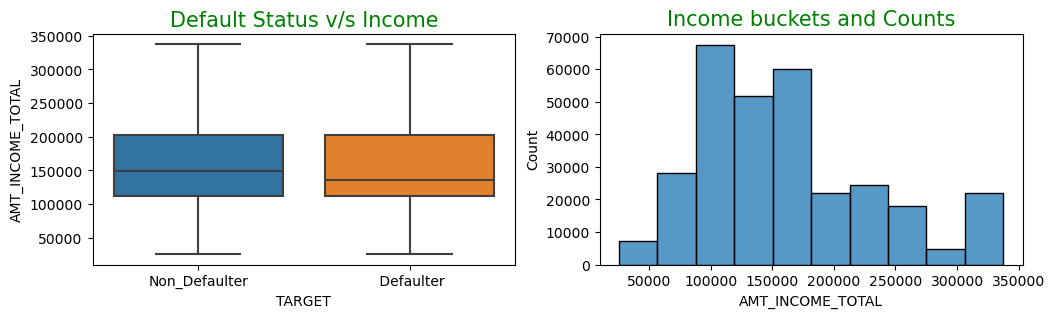

In [100]:
# Box plot to analyse between Income and Default status
plt.figure(figsize=(12,3))

plt.subplot(1, 2, 1)
sns.boxplot(data=df1 ,x='TARGET',y='AMT_INCOME_TOTAL')
plt.xticks((0,1),['Non_Defaulter',' Defaulter'])
plt.title("Default Status v/s Income",fontsize=15,color='green')

# Hist plot to analyse income distribution count
plt.subplot(1, 2, 2)
sns.histplot(data=df1,x='AMT_INCOME_TOTAL',bins=10)
plt.title("Income buckets and Counts",fontsize=15,color='green')

plt.show()

 #### INFERENCE

From box plot, eventhough the box range almost same, the median value of defaulter is less than the median value of repayer

#### AMT_INCOME_TOTAL & TARGET

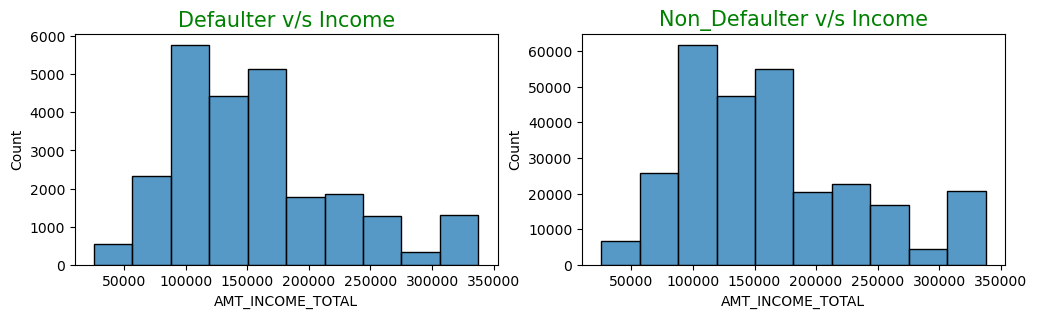

In [101]:
# hist plot to analyse between Income and Default status
plt.figure(figsize=(12,3))

plt.subplot(1, 2, 1)
sns.histplot(data=df1[(df1['TARGET']==1)],x='AMT_INCOME_TOTAL',bins=10)
plt.title("Defaulter v/s Income",fontsize=15,color='green')

plt.subplot(1, 2, 2)
sns.histplot(data=df1[(df1['TARGET']==0)],x='AMT_INCOME_TOTAL',bins=10)
plt.title("Non_Defaulter v/s Income",fontsize=15,color='green')

plt.show()

 #### INFERENCE

Both the plot follows a similar pattern of its total count plot shown above.From the hist plot it is clear that middle income applicants tend to default and repay the loans compared to other income ranges.

#### AMT_CREDIT & TARGET

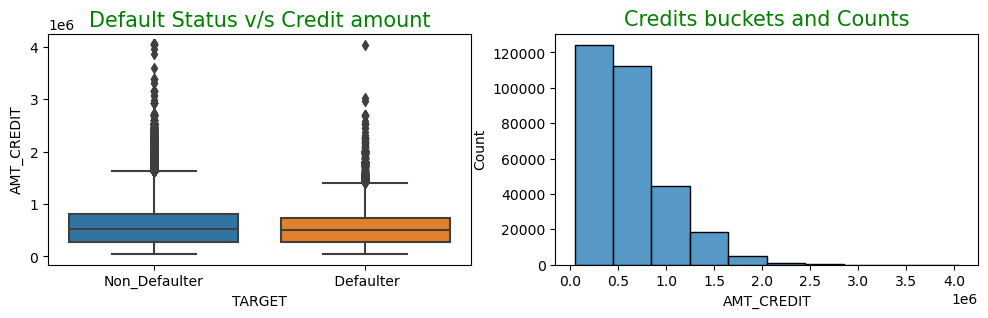

In [102]:
# Box plot to analyse between Income and Default status
plt.figure(figsize=(12,3))

plt.subplot(1, 2, 1)
sns.boxplot(data=df1 ,x='TARGET',y='AMT_CREDIT')
plt.xticks((0,1),['Non_Defaulter',' Defaulter'])
plt.title("Default Status v/s Credit amount",fontsize=15,color='green')

# Hist plot to analyse income distribution count
plt.subplot(1, 2, 2)
sns.histplot(data=df1,x='AMT_CREDIT',bins=10)
plt.title("Credits buckets and Counts",fontsize=15,color='green')

plt.show()

 #### INFERENCE

Majority of applicants look for low credit amount

#### AMT_CREDIT & TARGET

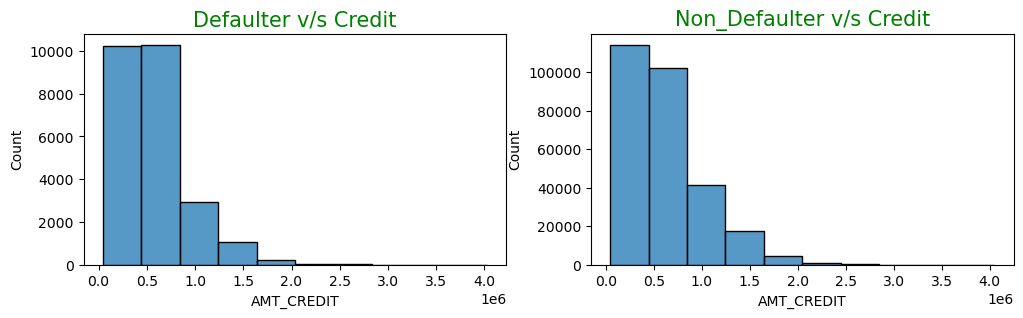

In [103]:
# Hist plot to analyse between Credit amount and Default status
plt.figure(figsize=(12,3))

plt.subplot(1, 2, 1)
sns.histplot(data=df1[(df1['TARGET']==1)],x='AMT_CREDIT',bins=10)
plt.title("Defaulter v/s Credit",fontsize=15,color='green')

plt.subplot(1, 2, 2)
sns.histplot(data=df1[(df1['TARGET']==0)],x='AMT_CREDIT',bins=10)
plt.title("Non_Defaulter v/s Credit",fontsize=15,color='green')

plt.show()

 #### INFERENCE

Approximatly 8-9 percentage of total count in each credit bucket makes default payments

#### DAYS_BIRTH & TARGET

In [104]:
# yougest applicant age in years
df1['DAYS_BIRTH'].sort_values().head(1)/365

235444    20.517808
Name: DAYS_BIRTH, dtype: float64

In [105]:
# eldest applicant age in years
df1['DAYS_BIRTH'].sort_values(ascending=False).head(1)/365

265026    69.120548
Name: DAYS_BIRTH, dtype: float64

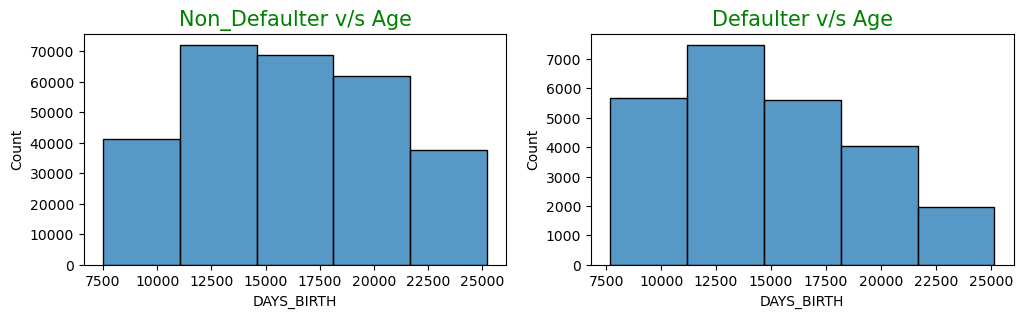

In [106]:
# Hist plot to analyse between DAYS_BIRTH and Default status

plt.figure(figsize=(12,3))

plt.subplot(1, 2, 1)
sns.histplot(data=df1[(df1['TARGET']==0)],x='DAYS_BIRTH',bins=5)
plt.title("Non_Defaulter v/s Age",fontsize=15,color='green')

plt.subplot(1, 2, 2)
sns.histplot(data=df1[(df1['TARGET']==1)],x='DAYS_BIRTH',bins=5)
plt.title("Defaulter v/s Age",fontsize=15,color='green')

plt.show()

 #### INFERENCE

Among the applicants youngest ones tends to Default loan than the elder ones.

#### FLAG_EMP_PHONE & TARGET

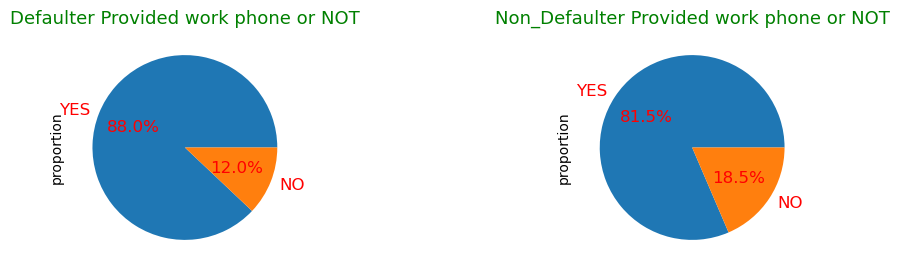

In [107]:
# Pie plot for defaulters who given work phone number
plt.figure(figsize=(12,3))
x=['YES','NO']

plt.subplot(1, 2, 1)
df1[(df1['TARGET']==1)]['FLAG_EMP_PHONE'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%',labels=x,textprops={'fontsize':12,'fontweight':2,'color':'red'})
plt.title("Defaulter Provided work phone or NOT",fontsize=13,color='green')

plt.subplot(1, 2, 2)
df1[(df1['TARGET']==0)]['FLAG_EMP_PHONE'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%',labels=x,textprops={'fontsize':12,'fontweight':2,'color':'red'})
plt.title("Non_Defaulter Provided work phone or NOT",fontsize=13,color='green')

plt.show()

 #### INFERENCE

Majority of those who default the loan payment given their work phone number

#### REGION_RATING_CLIENT & TARGET

AttributeError: 'numpy.int64' object has no attribute 'startswith'

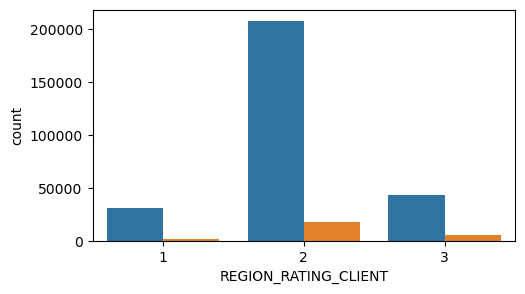

In [108]:
# Count plot for Region Rating and Defaulter Status

plt.figure(figsize=(12,3))

plt.subplot(1, 2, 1)
sns.countplot(data=df1,x='REGION_RATING_CLIENT',hue='TARGET')
plt.title("Region rating and Defaulter status ",fontsize=15,color='green')

# Pie plot for Region Rating and Defaulter 
plt.subplot(1, 2, 2)
df1.groupby(['REGION_RATING_CLIENT'])['TARGET'].mean().plot.pie(autopct='%1.1f%%',textprops={'fontsize':12,'fontweight':2,'color':'red'})
plt.title("Defaulters Region rating ",fontsize=15,color='green')

plt.show()

 #### INFERENCE

Applicants who lives in the type 2 region default more loans but the mean value of Default is high for region 3.

#### NAME_INCOME_TYPE & TARGET

In [109]:
df1.NAME_INCOME_TYPE.value_counts()

NAME_INCOME_TYPE
Working                 158122
Commercial associate     71253
Pensioner                55164
State servant            21609
Unemployed                  22
Student                     17
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

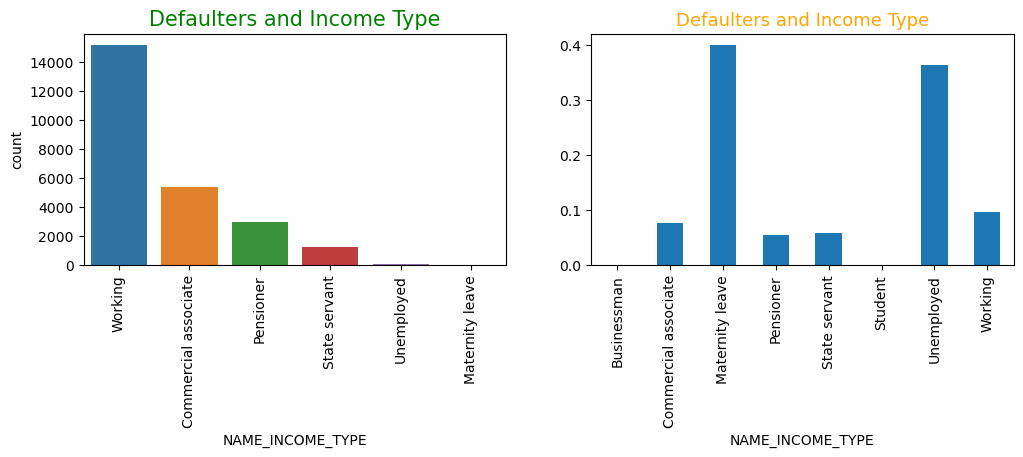

In [110]:
# Count plot for Income Type and Defaulters

plt.figure(figsize=(12,3))

plt.subplot(1, 2, 1)
sns.countplot(data=df1[(df1['TARGET']==1)],x='NAME_INCOME_TYPE')
plt.xticks(rotation=90)
plt.title("Defaulters and Income Type",fontsize=15,color='green')

plt.subplot(1, 2, 2)
df1.groupby(['NAME_INCOME_TYPE'])['TARGET'].mean().plot.bar()
plt.title("Defaulters and Income Type",fontsize=13,color='orange')

plt.show()

 #### INFERENCE

Applicants in Income Type, working default more loans, but mean value of default is very high for 'maternity leave' and 'Unemployed' class

#### NAME_HOUSING_TYPE & TARGET

In [111]:
df1.NAME_HOUSING_TYPE.value_counts()

NAME_HOUSING_TYPE
House / apartment      271705
With parents            14774
Municipal apartment     11145
Rented apartment         4862
Office apartment         2603
Co-op apartment          1113
Name: count, dtype: int64

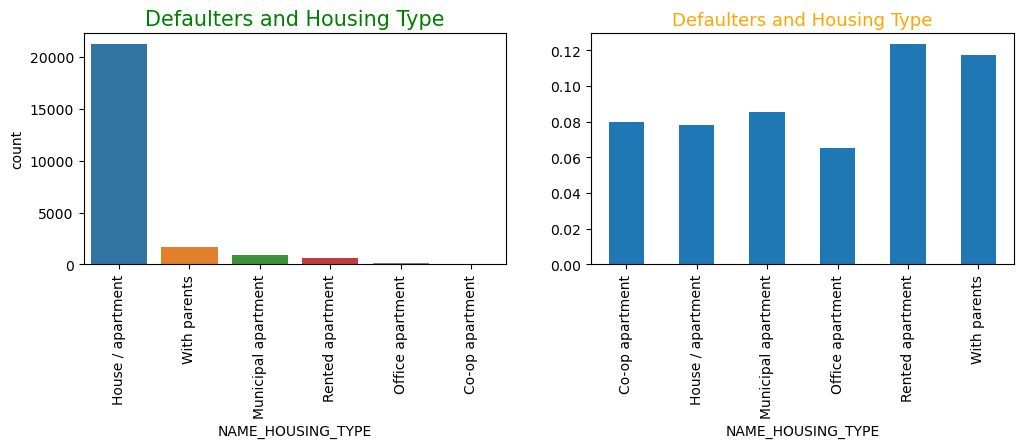

In [112]:
# Count plot for Housing Type and Defaulters

plt.figure(figsize=(12,3))

plt.subplot(1, 2, 1)
sns.countplot(data=df1[(df1['TARGET']==1)],x='NAME_HOUSING_TYPE')
plt.xticks(rotation=90)
plt.title("Defaulters and Housing Type",fontsize=15,color='green')

plt.subplot(1, 2, 2)
df1.groupby(['NAME_HOUSING_TYPE'])['TARGET'].mean().plot.bar()
plt.title("Defaulters and Housing Type",fontsize=13,color='orange')


plt.show()

 #### INFERENCE

Applicants with housing_Type House/apartment default more loans . But the mean value of Default is high for 'Rented apartment' and 'With parents' class.

#### NAME_EDUCATION_TYPE & TARGET

In [113]:
df1.NAME_EDUCATION_TYPE.value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    217579
Higher education                  74412
Incomplete higher                 10239
Lower secondary                    3809
Academic degree                     163
Name: count, dtype: int64

AttributeError: 'numpy.int64' object has no attribute 'startswith'

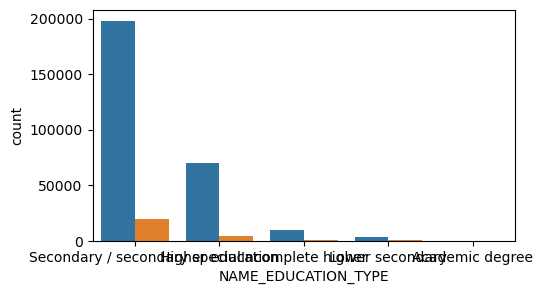

In [114]:
plt.figure(figsize=(12,3))

# Bar plot for Region Education_Type and Defaulter 
plt.subplot(1, 2, 1)
sns.countplot(data=df1,x='NAME_EDUCATION_TYPE',hue='TARGET')
plt.title("Education and Default Status ",fontsize=15,color='green')
plt.xticks(rotation=90)

# Bar plot for Region Education_Type and Defaulter 
plt.subplot(1, 2, 2)
df1.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].mean().plot.bar()
plt.title("Defaulters Education Level",fontsize=13,color='orange')

plt.show()

 #### INFERENCE

More number of applicants are from secondary class and more number of defaulters are also in secondary class. Also their Default mean value is high.

#### NAME_EDUCATION_TYPE & TARGET

In [115]:
df1.NAME_EDUCATION_TYPE.unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

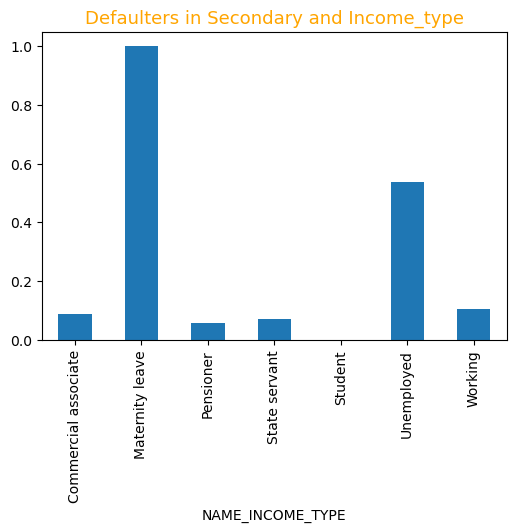

In [116]:
plt.figure(figsize=(6,4))
df1[(df1['NAME_EDUCATION_TYPE']=='Secondary / secondary special')].groupby(['NAME_INCOME_TYPE'])['TARGET'].mean().plot.bar()
plt.title("Defaulters in Secondary and Income_type",fontsize=13,color='orange')
plt.show()

 #### INFERENCE
Among the applicants in 'Secondary / secondary special' from 'NAME_EDUCATION_TYPE' variable 'Maternity leave' and 'Unemployed' default laon majorly.

#### NAME_FAMILY_STATUS & TARGET

AttributeError: 'numpy.int64' object has no attribute 'startswith'

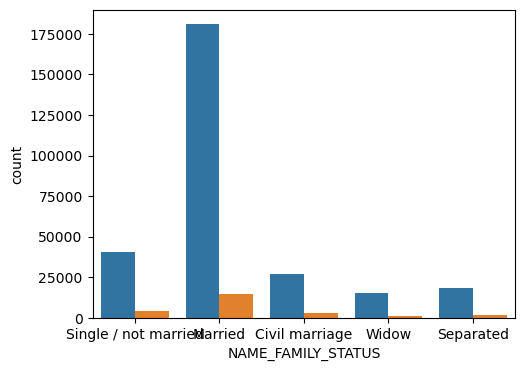

In [117]:
plt.figure(figsize=(12,4))

# Bar plot for Region Education_Type and Defaulter 
plt.subplot(1, 2, 1)
sns.countplot(data=df1,x='NAME_FAMILY_STATUS',hue='TARGET')
plt.title("FAMILY_STATUS and Default Status ",fontsize=15,color='green')
plt.xticks(rotation=90)

# Pie plot for Region Education_Type and Defaulter 
plt.subplot(1, 2, 2)
df1.groupby(['NAME_FAMILY_STATUS'])['TARGET'].mean().plot.pie(autopct='%1.1f%%',textprops={'fontsize':12,'fontweight':2,'color':'red'})
plt.title("Defaulters FAMILY_STATUS",fontsize=13,color='orange')

plt.show()

 #### INFERENCE
Applicant in Family status , Married apply for most loan and default most loan.But the mean range of Default is high for 'Civil Marriage' and 'Single'.

  # DATA Analysis:Previous data

In [118]:
df2.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

#### CONTRACT_TYPE

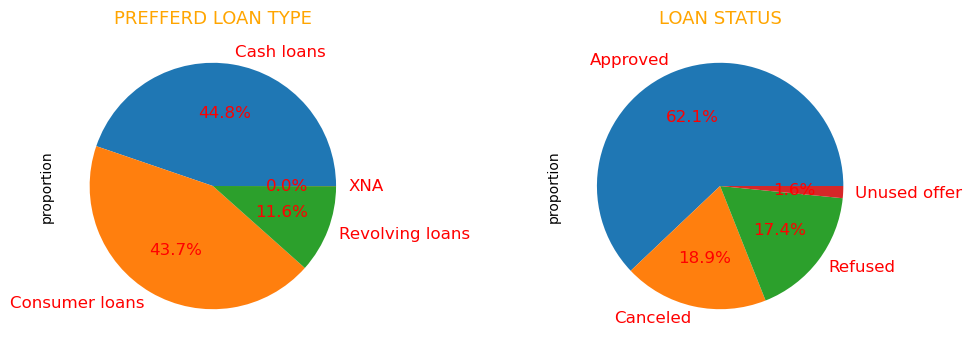

In [119]:
plt.figure(figsize=(12,4))

# Pie plot for 'NAME_CONTRACT_TYPE'
plt.subplot(1, 2, 1)
df2.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.pie(autopct='%1.1f%%',textprops={'fontsize':12,'fontweight':2,'color':'red'})
plt.title("PREFFERD LOAN TYPE",fontsize=13,color='orange')

# Pie plot for 'CONTRACT STATUS'
plt.subplot(1, 2, 2)
df2.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.pie(autopct='%1.1f%%',textprops={'fontsize':12,'fontweight':2,'color':'red'})
plt.title("LOAN STATUS",fontsize=13,color='orange')
plt.show()

 #### INFERENCE
In previous application 62.1% Application approved and 44.8 % applicants choose cash loans

#### CONTRACT_STATUS

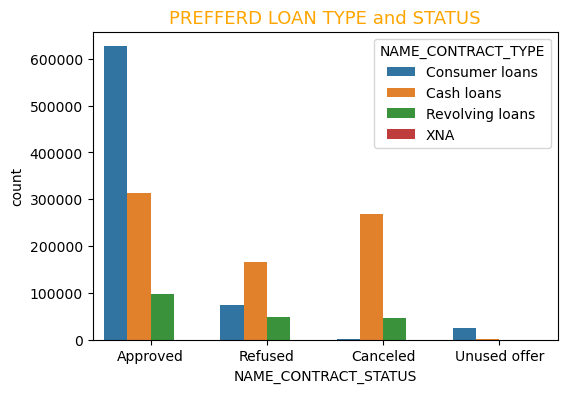

In [120]:
# Count plot for 'NAME_CONTRACT_STATUS'
plt.figure(figsize=(6,4))
sns.countplot(data=df2,x='NAME_CONTRACT_STATUS',hue='NAME_CONTRACT_TYPE')
plt.title("PREFFERD LOAN TYPE and STATUS",fontsize=13,color='orange')
plt.show()

 #### INFERENCE
Among the approved loans majority apply for consumer loans. cash loans are more preffered among those applicants refused

#### AMT_APPLICATION

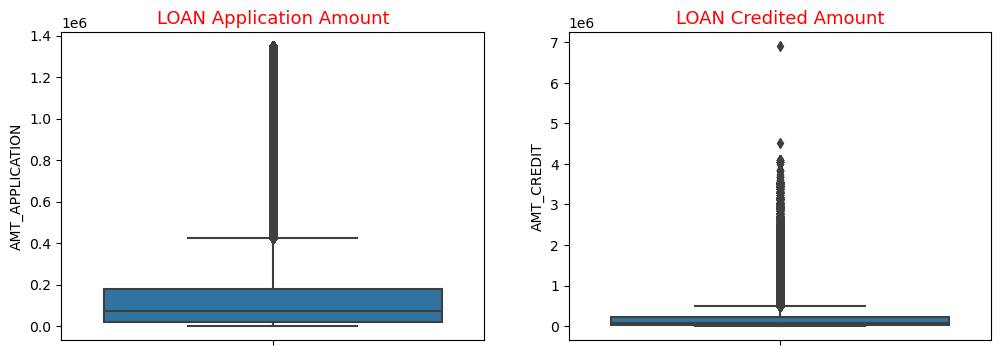

In [121]:
plt.figure(figsize=(12,4))

# Pie plot for 'NAME_CONTRACT_TYPE'
plt.subplot(1, 2, 1)
sns.boxplot(data=df2,y='AMT_APPLICATION')
plt.title("LOAN Application Amount",fontsize=13,color='red')

# Pie plot for 'CONTRACT STATUS'
plt.subplot(1, 2, 2)
sns.boxplot(data=df2,y='AMT_CREDIT')
plt.title("LOAN Credited Amount",fontsize=13,color='red')
plt.show()

 #### INFERENCE
From the boxplot it is clearly seen that , max of 'AMT_APPLICATION'is less than max of 'AMT_CREDIT' , which implies that for some of the applcants the credit amount is higher than applied amount.

#### NAME_PAYMENT_TYPE

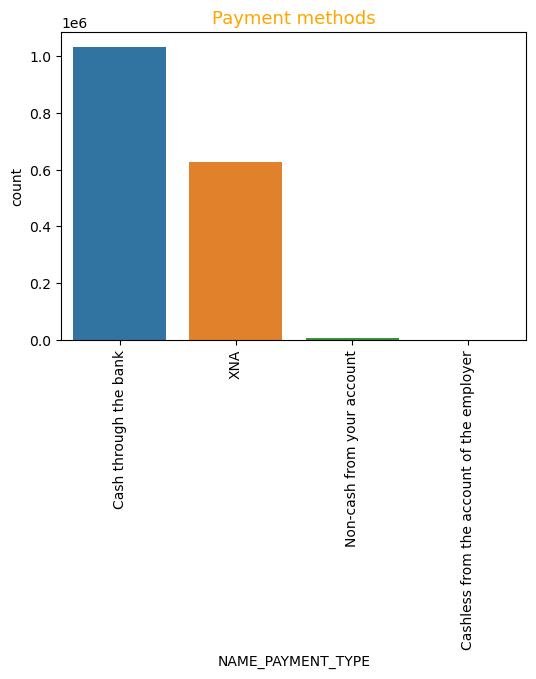

In [122]:
# Count plot for 'NAME_PAYMENT_TYPE'
plt.figure(figsize=(6,4))
sns.countplot(data=df2,x='NAME_PAYMENT_TYPE')
plt.title("Payment methods",fontsize=13,color='orange')
plt.xticks(rotation=90)
plt.show()

 #### INFERENCE
Applicants choose majorly 'cash through bank' methode for loan repayment

#### CNT_PAYMENT

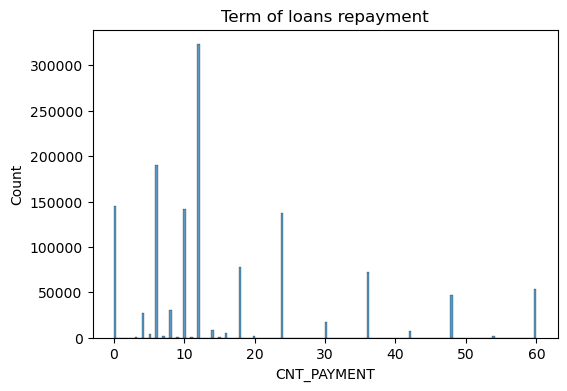

In [123]:
# Hist plot of loan repayment terms
plt.figure(figsize=(6,4))
sns.histplot(data=df2 ,x='CNT_PAYMENT')
plt.title('Term of loans repayment')
plt.show()

 #### INFERENCE
Majority of Applicants choose less than 15 term for loan repayment

  #  MERGED DATA

In [124]:
M_Data=df1.merge(df2,on='SK_ID_CURR')

In [125]:
M_Data.shape

(1410027, 57)

In [126]:
M_Data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


In [127]:
# create a series 'b'
a=M_Data['SK_ID_CURR'].value_counts()
b=a[a>1]
b

SK_ID_CURR
265681    73
173680    72
242412    68
206783    67
382179    64
          ..
430686     2
278666     2
239756     2
275748     2
269527     2
Name: count, Length: 237909, dtype: int64

 #### INFERENCE
Among those applicants in Application Data, 237909 applicants have previous history.

In [128]:
# Create a new dataframe 'c'
c=df1.merge(b,on='SK_ID_CURR')

In [129]:
c.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,count
0,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,1,2,1,1,0,0,School,828,3
1,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,1,2,2,2,0,0,Business Entity Type 3,617,9
2,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,1,1,2,2,0,0,Religion,1106,6
3,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,1,1,2,2,2,0,0,Other,2536,5
4,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,1,3,2,2,0,0,Business Entity Type 3,1562,7


In [130]:
c[(c['TARGET']==1)][['SK_ID_CURR','count']].head()

,SK_ID_CURR,count
28,100047,6
30,100049,5
71,100112,4
85,100130,2
108,100160,3


In [131]:
c[(c['TARGET']==1)][['SK_ID_CURR','count']].shape

(19410, 2)

#### INFERENCE
Applicants having previous loan history (count>1) with risk (TARGET=1)

In [132]:
c[(c['TARGET']==0)][['SK_ID_CURR','count']].head()

,SK_ID_CURR,count
0,100003,3
1,100006,9
2,100007,6
3,100008,5
4,100009,7


In [133]:
c[(c['TARGET']==0)][['SK_ID_CURR','count']].shape

(218499, 2)

 #### INFERENCE
Applicants having previous loan history (count>1) with less risk (TARGET=0)

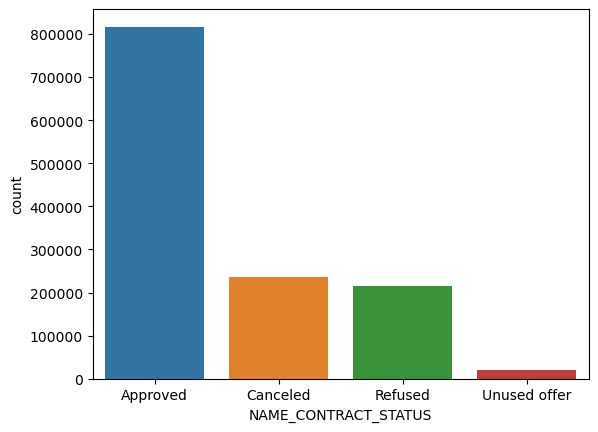

In [134]:
sns.countplot(data=M_Data[(M_Data['TARGET']==0)],x='NAME_CONTRACT_STATUS')
plt.show()

 #### INFERENCE
Merged data shows that among those applicant with Target value 0, 200000+ applicants where refused during the previous application.

# MAJOR CORRELATIONS b/w VARIABLES

In [135]:
# Change some of  the numerical columns to categorical one for the ease of correlation by forming buckets
df1['Income_Bucket'] = pd.qcut(df1.AMT_INCOME_TOTAL, [0, 0.2, 0.4, 0.6, 0.8, 1], ["VL","L","M","H","VH"])
df1['CREDIT_Bucket'] = pd.qcut(df1.AMT_CREDIT, [0, 0.2, 0.4, 0.6, 0.8, 1], ["VL","L","M","H","VH"])
df1['ANNUITY_Bucket'] = pd.qcut(df1.AMT_ANNUITY, [0, 0.2, 0.4, 0.6, 0.8, 1], ["VL","L","M","H","VH"])
df1['Age_Bucket'] = pd.qcut(df1.DAYS_BIRTH, [0, 0.2, 0.4, 0.6, 0.8, 1], ["20-30","40-50","50-60","30-40","60-70"])

In [136]:
df1.TARGET.value_counts(normalize= True)

TARGET
0    0.919155
1    0.080845
Name: proportion, dtype: float64

#### GENDER AND FLAG_OWN_CAR

In [137]:
pt= pd.pivot_table(data=df1,index="FLAG_OWN_CAR",columns="CODE_GENDER",values="TARGET")
pt

CODE_GENDER,F,M
FLAG_OWN_CAR,,
N,0.073478,0.125481
Y,0.058032,0.083545


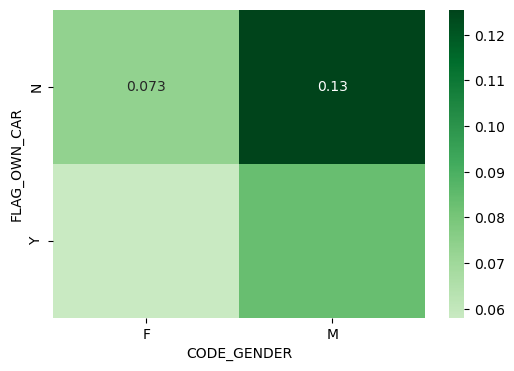

In [138]:
plt.figure(figsize=(6,4))
sns.heatmap(pt, annot=True, cmap="Greens", center= 0.0808)
plt.show()


 #### INFERENCE
STRONG DEFAULTER CORRELATION in, FLAG_OWN_CAR (N) + CODE_GENDER(M) - 0.13

#### GENDER AND CREDIT_Bucket	

In [139]:
pt= pd.pivot_table(data=df1,index="CREDIT_Bucket",columns="CODE_GENDER",values="TARGET")
pt

CODE_GENDER,F,M
CREDIT_Bucket,,
VL,0.061815,0.094747
L,0.079760,0.114997
M,0.084941,0.129855
H,0.068800,0.097977
VH,0.055635,0.070345


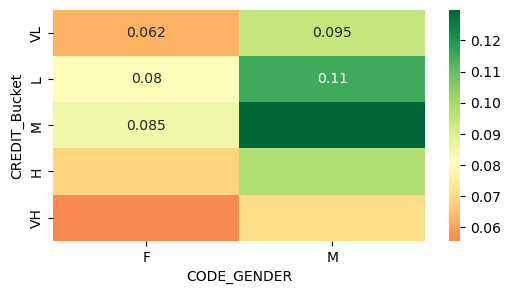

In [140]:
plt.figure(figsize=(6,3))
sns.heatmap(pt, annot=True, cmap="RdYlGn", center= 0.0808)
plt.show()

 #### INFERENCE
STRONG DEFAULTER CORRELATION in,CREDIT_Bucket (M) + CODE_GENDER(M) - 0.13

#### GENDER AND NAME_INCOME_TYPE

In [141]:
pt= pd.pivot_table(data=df1,index="NAME_INCOME_TYPE",columns="CODE_GENDER",values="TARGET")
pt

CODE_GENDER,F,M
NAME_INCOME_TYPE,,
Businessman,0.000000,0.000000
Commercial associate,0.066698,0.088426
Maternity leave,0.500000,0.000000
Pensioner,0.049567,0.073311
State servant,0.053458,0.068717
Student,0.000000,0.000000
Unemployed,0.352941,0.400000
Working,0.083827,0.115180


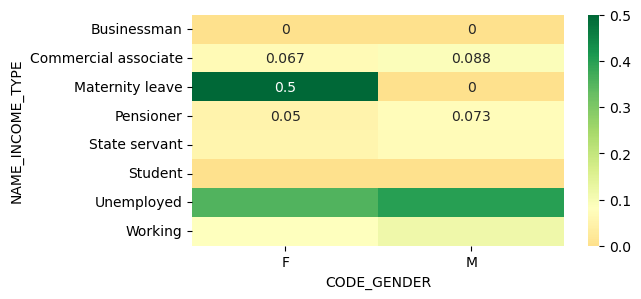

In [142]:
plt.figure(figsize=(6,3))
sns.heatmap(pt, annot=True, cmap="RdYlGn", center= 0.0808)
plt.show()

 #### INFERENCE
STRONG DEFAULTER CORRELATION in,NAME_INCOME_TYPE (Maternity leave) + CODE_GENDER(F) - 0.5

#### GENDER AND NAME_EDUCATION_TYPE

In [143]:
pt= pd.pivot_table(data=df1,index="NAME_EDUCATION_TYPE",columns="CODE_GENDER",values="TARGET")
pt

CODE_GENDER,F,M
NAME_EDUCATION_TYPE,,
Academic degree,0.030000,0.000000
Higher education,0.048512,0.064088
Incomplete higher,0.080326,0.092281
Lower secondary,0.092761,0.135153
Secondary / secondary special,0.076792,0.113869


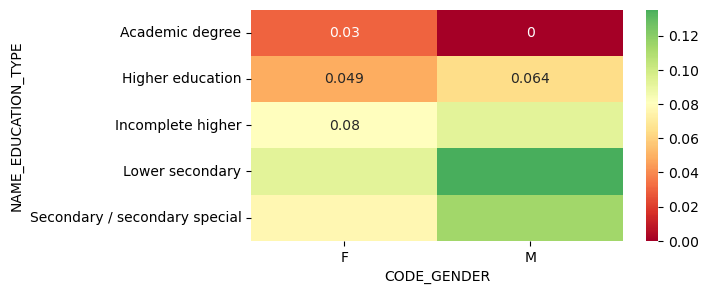

In [144]:
plt.figure(figsize=(6,3))
sns.heatmap(pt, annot=True, cmap="RdYlGn", center= 0.0808)
plt.show()

 #### INFERENCE
STRONG NON_DEFAULTER CORRELATION in,NAME_EDUCATION_TYPE (Academic degree) + CODE_GENDER(M) - 0

#### GENDER AND NAME_FAMILY_STATUS

In [145]:
pt= pd.pivot_table(data=df1,index="NAME_FAMILY_STATUS",columns="CODE_GENDER",values="TARGET")
pt

CODE_GENDER,F,M
NAME_FAMILY_STATUS,,
Civil marriage,0.084417,0.134776
Married,0.068028,0.088317
Separated,0.067589,0.133939
Single / not married,0.077778,0.133274
Widow,0.054637,0.121516


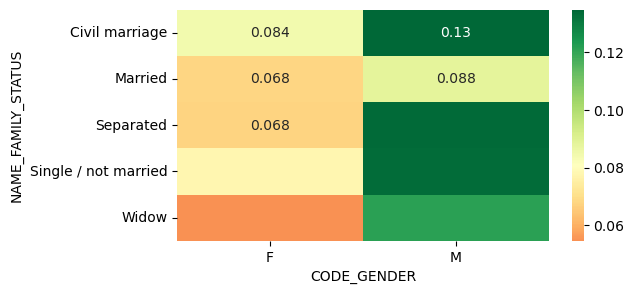

In [146]:
plt.figure(figsize=(6,3))
sns.heatmap(pt, annot=True, cmap="RdYlGn", center= 0.0808)
plt.show()

 #### INFERENCE
STRONG DEFAULTER CORRELATION in,NAME_FAMILY_STATUS(Single,Seperated,Civil marriage) + CODE_GENDER(M) - 0.13

#### NAME_CONTRACT_TYPE AND FLAG_OWN_CAR

In [147]:
pt= pd.pivot_table(data=df1,index="FLAG_OWN_CAR",columns="NAME_CONTRACT_TYPE",values="TARGET")
pt

NAME_CONTRACT_TYPE,Cash loans,Revolving loans
FLAG_OWN_CAR,,
N,0.087798,0.059001
Y,0.075403,0.046316


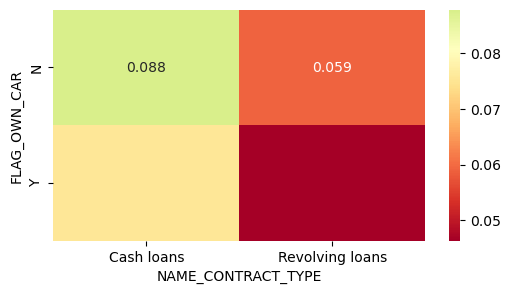

In [148]:
plt.figure(figsize=(6,3))
sns.heatmap(pt, annot=True, cmap="RdYlGn", center= 0.0808)
plt.show()

 #### INFERENCE
STRONG NON_DEFAULTER CORRELATION in,FLAG_OWN_CAR(Y) + NAME_CONTRACT_TYPE(Revolving loans) - 0.046

#### NAME_CONTRACT_TYPE AND Income_Bucket

In [149]:
pt= pd.pivot_table(data=df1,index="Income_Bucket",columns="NAME_CONTRACT_TYPE",values="TARGET")
pt

NAME_CONTRACT_TYPE,Cash loans,Revolving loans
Income_Bucket,,
VL,0.084167,0.067172
L,0.088497,0.064015
M,0.089944,0.053979
H,0.083875,0.043456
VH,0.068824,0.027695


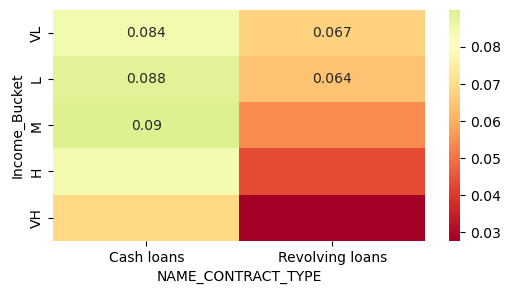

In [150]:
plt.figure(figsize=(6,3))
sns.heatmap(pt, annot=True, cmap="RdYlGn", center= 0.0808)
plt.show()

 #### INFERENCE
STRONG NON_DEFAULTER CORRELATION in,Income_Bucket(VH) + NAME_CONTRACT_TYPE(Revolving loans) - 0.028

#### NAME_CONTRACT_TYPE AND NAME_EDUCATION_TYPE

In [151]:
pt= pd.pivot_table(data=df1,index="NAME_EDUCATION_TYPE",columns="NAME_CONTRACT_TYPE",values="TARGET")
pt

NAME_CONTRACT_TYPE,Cash loans,Revolving loans
NAME_EDUCATION_TYPE,,
Academic degree,0.020690,0.000000
Higher education,0.056638,0.032936
Incomplete higher,0.088951,0.055916
Lower secondary,0.110155,0.097561
Secondary / secondary special,0.091691,0.065393


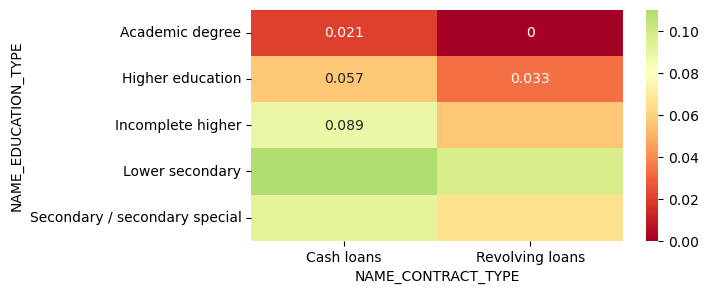

In [152]:
plt.figure(figsize=(6,3))
sns.heatmap(pt, annot=True, cmap="RdYlGn", center= 0.0808)
plt.show()

 #### INFERENCE
STRONG NON_DEFAULTER CORRELATION in,NAME_EDUCATION_TYPE (Academic degree) + NAME_CONTRACT_TYPE(Revolving loans) - 0


#### NAME_CONTRACT_TYPE AND Age_Bucket

In [153]:
pt= pd.pivot_table(data=df1,index="Age_Bucket",columns="NAME_CONTRACT_TYPE",values="TARGET")
pt

NAME_CONTRACT_TYPE,Cash loans,Revolving loans
Age_Bucket,,
20-30,0.118670,0.077222
40-50,0.097743,0.054699
50-60,0.081518,0.048025
30-40,0.069912,0.041093
60-70,0.052833,0.034500


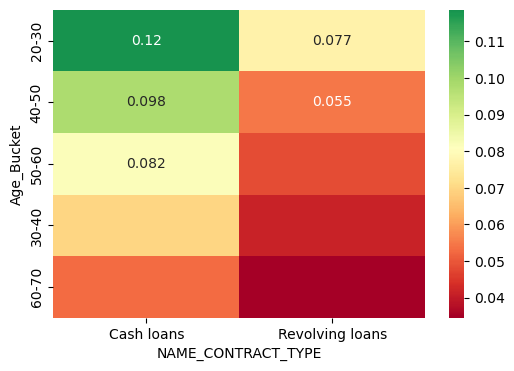

In [154]:
plt.figure(figsize=(6,4))
sns.heatmap(pt, annot=True, cmap="RdYlGn", center= 0.0808)
plt.show()

 #### INFERENCE
STRONG NON_DEFAULTER CORRELATION in,Age_Bucket (60-70) + NAME_CONTRACT_TYPE(Revolving loans) - 0.034

#### NAME_CONTRACT_TYPE AND REGION_RATING_CLIENT	

In [155]:
pt= pd.pivot_table(data=df1,index="REGION_RATING_CLIENT",columns="NAME_CONTRACT_TYPE",values="TARGET")
pt

NAME_CONTRACT_TYPE,Cash loans,Revolving loans
REGION_RATING_CLIENT,,
1,0.051141,0.026776
2,0.081301,0.056198
3,0.115224,0.071062


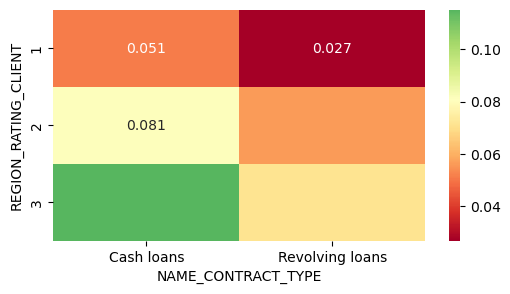

In [156]:
plt.figure(figsize=(6,3))
sns.heatmap(pt, annot=True, cmap="RdYlGn", center= 0.0808)
plt.show()


 #### INFERENCE
STRONG NON_DEFAULTER CORRELATION in,.REGION_RATING_CLIENT(1) + NAME_CONTRACT_TYPE(Revolving loans) - 0.027

#### CREDIT_Bucket AND ANNUITY_Bucket	

In [157]:
pt= pd.pivot_table(data=df1,index="ANNUITY_Bucket",columns="CREDIT_Bucket",values="TARGET")
pt

CREDIT_Bucket,VL,L,M,H,VH
ANNUITY_Bucket,,,,,
VL,0.069093,0.072070,0.053175,0.000000,NaN
L,0.093473,0.097977,0.073723,0.059982,NaN
M,0.051490,0.111308,0.106253,0.069765,0.068706
H,0.133962,0.089983,0.128416,0.088548,0.071966
VH,NaN,0.082192,0.093396,0.083740,0.054826


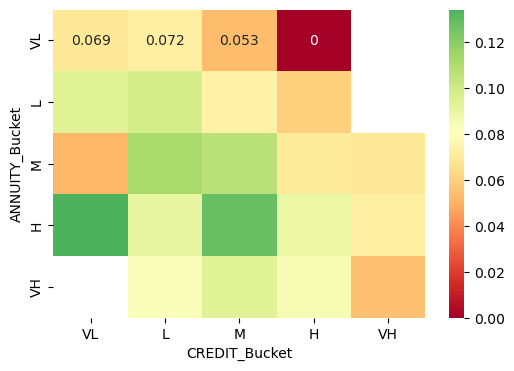

In [158]:
plt.figure(figsize=(6,4))
sns.heatmap(pt, annot=True, cmap="RdYlGn", center= 0.0808)
plt.show()

STRONG NON_DEFAULTER CORRELATION in,ANNUITY_Bucket(VH) + CREDIT_Bucket(VH) - 0.0

### Correlation Matrix

In [159]:
# Create a data frame with Target 0
df1_target0=df1[df1['TARGET']==0]
df1_target0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,Income_Bucket,CREDIT_Bucket,ANNUITY_Bucket,Age_Bucket
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1,1,0,0,School,828,VH,VH,H,50-60
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,2,2,0,0,Government,815,VL,VL,VL,30-40
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2,2,0,0,Business Entity Type 3,617,L,L,H,30-40
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,2,2,0,0,Religion,1106,L,M,L,30-40
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,2,2,0,0,Other,2536,VL,M,M,50-60


In [165]:
# Find the numerical columns
num_cols=['CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'LIVE_REGION_NOT_WORK_REGION',
       'DAYS_LAST_PHONE_CHANGE']
df1_target0_num=df1_target0[num_cols]
df1_target0_num.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,DAYS_LAST_PHONE_CHANGE
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186,291,1,1,0,1,2,1,1,0,0,828
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260,2531,1,1,1,1,1,2,2,0,0,815
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,9833,2437,1,1,0,1,2,2,2,0,0,617
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,4311,3458,1,1,0,1,1,2,2,0,0,1106
5,0,99000.0,490495.5,27517.5,454500.0,0.035792,16941,1588,4970,477,1,1,1,1,2,2,2,0,0,2536


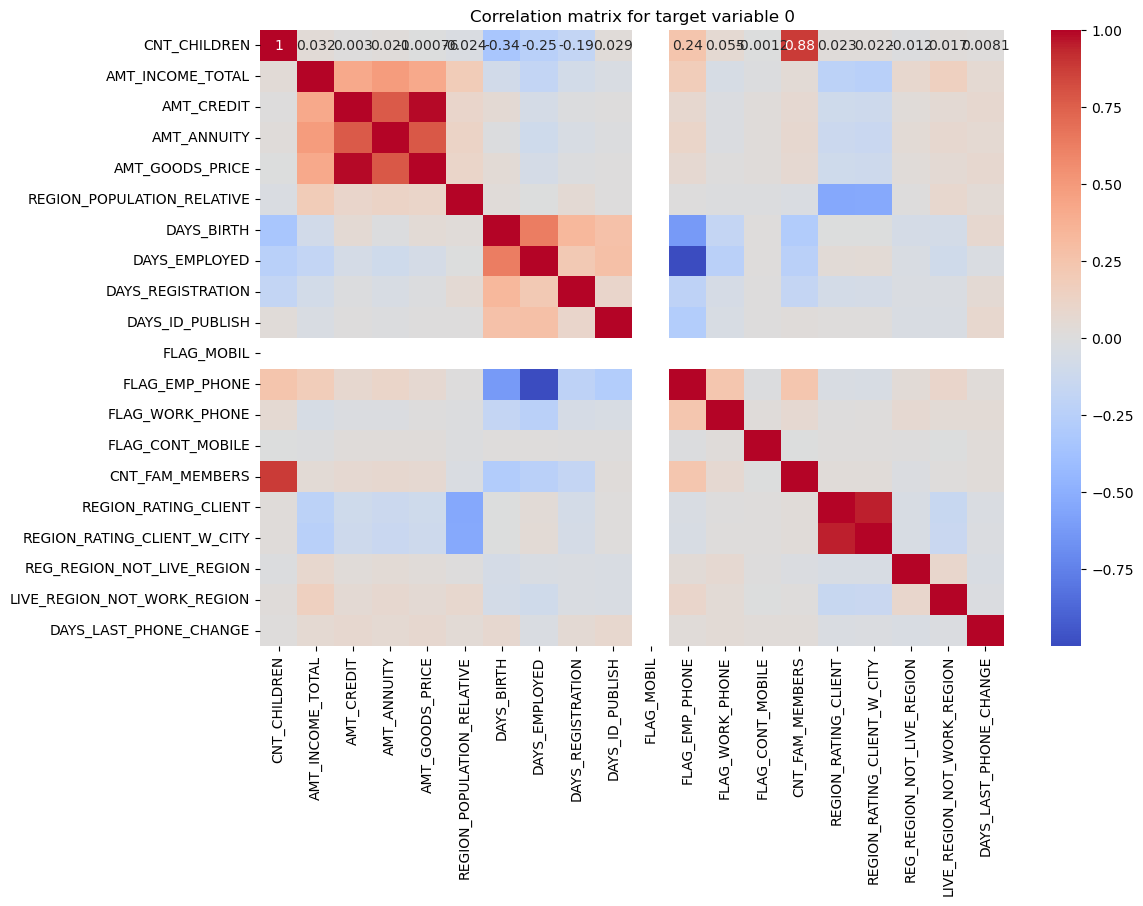

In [166]:
# Plot heatmap for the numerical columns for Target=0
plt.figure(figsize=(12,8)) 
sns.heatmap(df1_target0_num.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation matrix for target variable 0')
plt.show()

In [175]:
#Find the 10 most correlated varibles for Target=0
corr0 = df1_target0_num.corr()
corr_df0 = corr0.where(np.triu(np.ones(corr0.shape), k=1).astype(bool))
corr_df0 = corr_df0.unstack().reset_index().dropna(subset = [0])
corr_df0.columns = ['VAR1', 'VAR2', 'Correlation_Value']
corr_df0['Corr_abs'] = abs(corr_df0['Correlation_Value'])
corr_df0.sort_values(by = "Corr_abs", ascending =False, inplace = True)
corr_df0.head(10)

,VAR1,VAR2,Correlation_Value,Corr_abs
227,FLAG_EMP_PHONE,DAYS_EMPLOYED,-0.999756,0.999756
82,AMT_GOODS_PRICE,AMT_CREDIT,0.987263,0.987263
335,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950076,0.950076
280,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878590,0.878590
83,AMT_GOODS_PRICE,AMT_ANNUITY,0.776672,0.776672
62,AMT_ANNUITY,AMT_CREDIT,0.771115,0.771115
146,DAYS_EMPLOYED,DAYS_BIRTH,0.625954,0.625954
226,FLAG_EMP_PHONE,DAYS_BIRTH,-0.621916,0.621916
305,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,-0.538914,0.538914
325,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,-0.537223,0.537223


In [171]:
# Create a data frame with Target 1
df1_target1=df1[df1['TARGET']==1]
df1_target1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,Income_Bucket,CREDIT_Bucket,ANNUITY_Bucket,Age_Bucket
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2,2,0,0,Business Entity Type 3,1134,H,L,M,20-30
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,3,2,0,0,Business Entity Type 3,161,L,VH,M,30-40
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,2,2,0,0,Business Entity Type 3,1075,H,VH,H,30-40
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,3,3,0,0,Self-employed,1480,L,L,L,40-50
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,2,2,0,0,XNA,0,VL,VL,VL,60-70


In [172]:
df1_target1_num=df1_target1[num_cols]

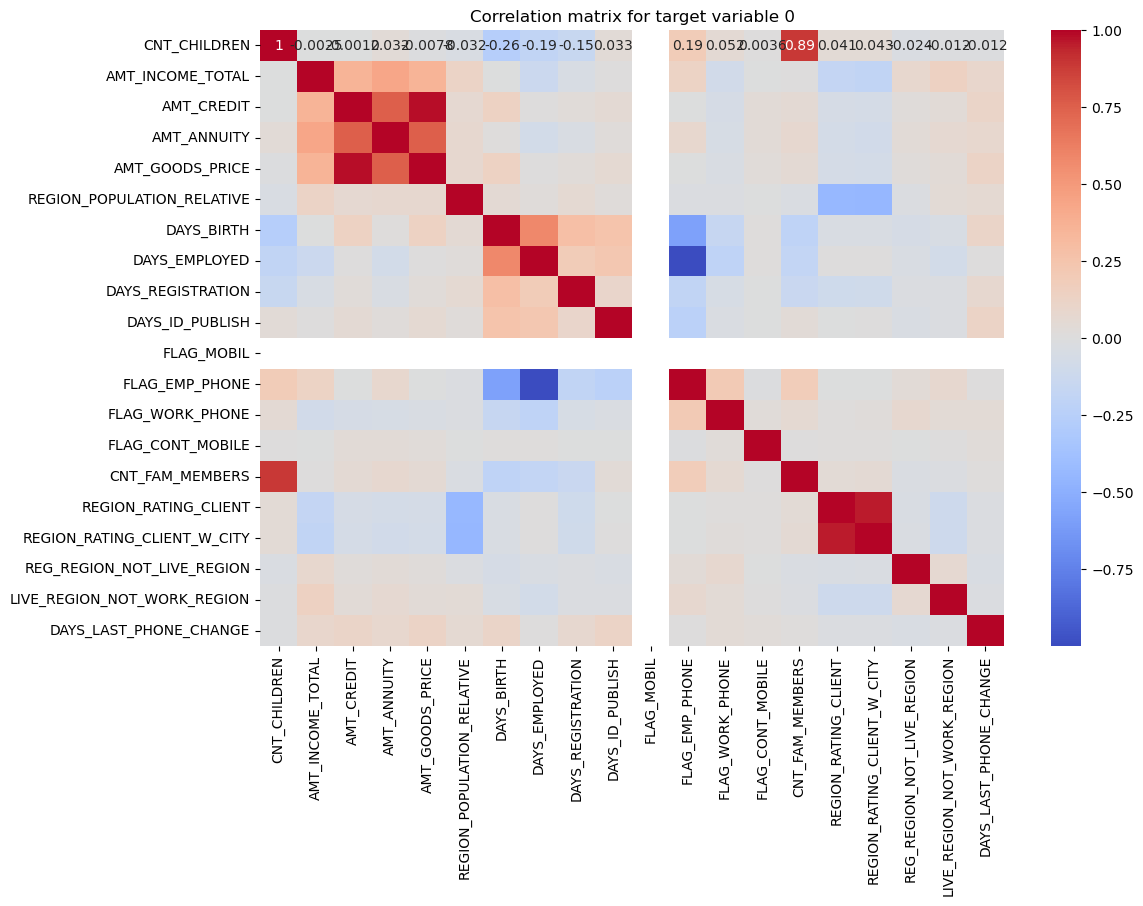

In [173]:
# Plot heatmap for the numerical columns for Target=1
plt.figure(figsize=(12,8)) 
sns.heatmap(df1_target1_num.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation matrix for target variable 0')
plt.show()

In [174]:
#Find the 10 most correlated varibles for Target=1
corr0 = df1_target1_num.corr()
corr_df0 = corr0.where(np.triu(np.ones(corr0.shape), k=1).astype(bool))
corr_df0 = corr_df0.unstack().reset_index().dropna(subset = [0])
corr_df0.columns = ['VAR1', 'VAR2', 'Correlation_Value']
corr_df0['Corr_abs'] = abs(corr_df0['Correlation_Value'])
corr_df0.sort_values(by = "Corr_abs", ascending =False, inplace = True)
corr_df0.head(10)

,VAR1,VAR2,Correlation_Value,Corr_abs
227,FLAG_EMP_PHONE,DAYS_EMPLOYED,-0.999705,0.999705
82,AMT_GOODS_PRICE,AMT_CREDIT,0.983072,0.983072
335,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956555,0.956555
280,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885543,0.885543
83,AMT_GOODS_PRICE,AMT_ANNUITY,0.752589,0.752589
62,AMT_ANNUITY,AMT_CREDIT,0.751891,0.751891
146,DAYS_EMPLOYED,DAYS_BIRTH,0.582609,0.582609
226,FLAG_EMP_PHONE,DAYS_BIRTH,-0.578943,0.578943
325,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,-0.446989,0.446989
305,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,-0.443245,0.443245


### INFERENCE
Both deafaulter and Non_Defaulter has the same varibles as the top correlated variables